In [7]:
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.plot_functions import *
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
from numpy import pi
from scipy.special import jv
import math
from pathlib import Path
import matplotlib.pyplot as plt
figsize_hams=(3.9,3.9)
fontsize = 10
PlotParams(fontsize=fontsize)

In [8]:
# tanh gradient
# N = 40
# alpha = 10
# d = 0.1
# nh = N/2
# ymin = jv(0, 3.8316)
# kn = np.zeros(N)
# for i in range(N):
#     kn[i] = alpha*math.tanh(d*(i- nh- 0.5))/4/d
# knmax = np.max(np.abs(kn))
# gradients = kn/knmax*ymin

# plt.plot(range(N), -gradients)
# plt.show()


### Get Ham from gradient

In [10]:
Ndiffs = 8
ymin = jv(0, 3.8316)
gradients = np.linspace(-ymin, ymin, Ndiffs) # for linear
#get A vals to get the right gradient
omega = 8
drive_style = "accumulative"

xvals = ComputeAValsFromRequiredGradients(gradients)
A_vals = GetAValsFromBesselXVals(xvals, omega, addition_type=drive_style, constant_shift="zero centre") # get actual shaking values

_, HF = CreateHFGeneral(Ndiffs+1,
                        [int(i) for i in list(np.linspace(0,Ndiffs,Ndiffs+1))],
                        [Cosine]*(Ndiffs+1),
                        [[i,omega,0,0] for i in A_vals], #a, omega, phi onsite
        
            
                        2*pi/omega,
                        0
                        )

#make real
if np.all(np.imag(HF))==0:
    print("Ham is real")
    HF =np.real(HF)

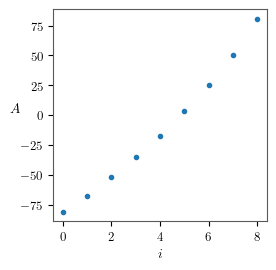

In [26]:

N= len(A_vals)
fig, ax = plt.subplots(figsize=(7/2.54,7/2.54))
ax.plot(range(N), A_vals, '.')
ax.set_ylabel(r"$A$", rotation=0)
ax.set_xticks(np.arange(0,N,2))
ax.set_xlabel(r"$i$")
plt.show()


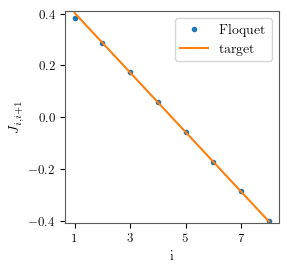

In [24]:

# plot gradient
fig, ax = plt.subplots(figsize=(7/2.54,7/2.54))
y = [np.round(-HF[i,i+1], 3) for i in range(N-1)]
ax.plot(range(N-1), y, '.', label = r"Floquet")
plt.plot(range(N-1), gradients, 
        #  label=r"$10 \> \tanh(0.1*(i- nh- 0.5))/(4*0.1)$"
        label = "target"
         )
ax.set_xlabel("i")
ax.set_ylabel(r"$J_{i, i+1}$")
ax.set_ylim([-0.41, 0.41])
xticks = np.arange(0,N-1,2)
ax.set_xticks(xticks)
ax.set_xticklabels([str(i+1) for i in xticks])
plt.legend()
plt.show()


In [ ]:


# plot gradient 2
y = [np.round(np.real(HF[i,i+2]), 3) for i in range(N-2)]
fig, ax = plt.subplots()
ax.plot(range(N-2), y, '.')
ax.set_ylabel(r"$J_{i, i+2}$")
ax.set_ylim([-0.41, 0.41])
ax.set_xlabel("i")
ax.set_xticks(np.arange(0,N-2,2))
plt.show()

In [ ]:
#SSH4
num_sites = 9
centres = np.array(range(num_sites))
funcs = [Cosine]*num_sites
a1 = 16.917322691940058; a2 = -50; a3 = 38.315948852085626; a4 = -10
omega0 = 25; T = 2*pi/omega0
phi1 = 0; phi2 = 0; phi3 = 0; phi4 = 0
# onsite1 =0.0697854749060796; onsite2 = 0.068;  onsite3=0;onsite4 = -0.068
onsite1 = onsite2 = onsite3 = onsite4 = 0
# params = [onsite0, [a1, omega1, phi1, onsite1], [(a2, a3), (omega2, omega3), (phi2, phi3), onsite2], [a4, omega4, phi4, onsite4]]*2
params = ([ [a1, omega0, phi1, onsite1], [a2, omega0, phi2, onsite2], [a3, omega0, phi3, onsite3], [a4, omega0, phi4, onsite4]]*3)[:num_sites]
_, HF = CreateHFGeneral(num_sites, centres, funcs, params, T, circle_boundary=0)

colourbar_min = np.min(np.real(HF))
colourbar_max = np.max(np.real(HF))

plt.rc('text.latex', preamble=r'\usepackage{amsmath,nicefrac,xfrac}')
# mpl.verbose.level = 'debug-annoying'
 

print(colourbar_max, colourbar_min)
ssh_plot_dir_path = Path().absolute().parent.parent/"figures"/"paper"/"ssh4_model.pdf"
PlotParams(fontsize=10)
# PlotRealHamiltonian(HF, figsize=figsize_hams, colourbar_pad = 0.05, colourbar_size_percentage=10, save_location=ssh_plot_dir_path, axes_tick_pos=[0,2,4,6,8], axes_tick_labels=[1,3,5,7,9])
# PlotRealHamiltonian(HF, figsize=figsize_hams, colourbar_pad=0.05, colourbar_size_percentage=10, 
#                     save_location = False, axes_tick_pos=[0,2,4,6,8], axes_tick_labels=[1,3,5,7,9], 
#                     cmap_lims=(-0.8,0.4), colourbar_ticks = [-0.8,-0.6,-0.4,-0.2,0,0.2,0.4, 0.6])

PlotRealHamiltonian(HF, figsize=figsize_hams, 
                    # colourbar_pad=0.05, colourbar_size_percentage=10, 
                    # save_location = ssh_plot_dir_path,
                    #   axes_tick_pos=[0,2,4,6,8], axes_tick_labels=[1,3,5,7,9], 
                    # data_cmap_lims = (-0.8, 0.8), colourbar_cmap_lims=(-0.8,0.4), colourbar_ticks = np.arange(-0.8,1.2,0.4)
                    )